The code of Spatial Transformer Networks experimenting on MNIST is based on the code in github: https://github.com/zsdonghao/Spatial-Transformer-Nets.git <br>
The code here is part of the progress on learning-based registration project. 

In [1]:
import sys
import os

import numpy as np
import tensorflow as tf
import Functions 
from importlib import reload
import matplotlib.pyplot as plt
import imp
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
imp.reload(Functions)

In [2]:
## Read the original datasets
## --------------------------------
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

In [27]:
## Enlarge datasets with distortion
## --------------------------------
X_train_40 = Functions.pad_distort_ims_fn(X_train,output_size=(60,60,1))
X_test_40 = Functions.pad_distort_ims_fn(X_test,output_size=(60,60,1))

X_train_40 = np.expand_dims(X_train_40,axis=-1) 
X_test_40 = np.expand_dims(X_test_40,axis=-1) 

1200it [00:50, 23.61it/s]
200it [00:09, 22.70it/s]


In [28]:
X_test_40.shape

(10000, 60, 60, 1)

In [ ]:
%matplotlib inline
index = np.random.randint(0,10000)

plt.imshow(X_test_40[index].reshape((60,60)))

plt.show()


In [29]:
X_train_40 = X_train_40 /255.0
X_test_40 = X_test_40 /255.0

In [3]:
X_train_40 = X_train /255.0
X_test_40 = X_test /255.0

In [30]:
y_train_vec = to_categorical(y_train)
y_test_vec = to_categorical(y_test)

In [ ]:
## Some github version
## --------------------------------
imp.reload(Functions)
# parameters to set for the graph
batch_size = 64
input_dims = (60,60,1)
output_dims = (28,28,1)
#output_dims = None


## Layers
## ---------------
value = [1, 0, 0, 0, 1, 0]
theta_init = tf.keras.initializers.Constant(value)
# Input layer
layer_nin = tf.keras.layers.Input(shape=input_dims,name='input_layer')
# Localization Layers
#layer_local_1 = tf.keras.layers.Flatten(name='layer_local_1')
#layer_local_2 = tf.keras.layers.Dense(units=20,activation='tanh',name='layer_local_2')
#layer_local_3 = tf.keras.layers.Dropout(rate=0.1,name='layer_local_3')
layer_local_1 = tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),strides=(2,2),activation='relu',padding="same",name="layer_local_1")
layer_local_2 = tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),strides=(2,2),activation='relu',padding="same",name="layer_local_2")
layer_local_3 = tf.keras.layers.Flatten(name="layer_local_3")
layer_local_4 = tf.keras.layers.Dropout(0.1,name="layer_local_4")
layer_theta = tf.keras.layers.Dense(units=6,activation='linear',name="layer_theta",
               kernel_initializer=tf.keras.initializers.Zeros(),bias_initializer=theta_init)
# Spatial transformer
transformer = Functions.keras_tranformer_layer(output_dims=output_dims,name='transformer')
# Classifier
layer_class_1 = tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),strides=(2,2),padding="same",name="layer_class_1",activation='relu')
layer_class_2 = tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),strides=(2,2),padding="same",name="layer_class_2",activation='relu')
layer_class_3 = tf.keras.layers.Flatten(name='layer_class_3')
layer_class_4 = tf.keras.layers.Dense(units=400,name="layer_class_4",activation="relu")
layer_class_5 = tf.keras.layers.Dense(units=10,activation="linear",name="layer_class_5")


## Model 
## -----------------
t_local_1 = layer_local_1(layer_nin)
t_local_2 = layer_local_2(t_local_1)
t_local_3 = layer_local_3(t_local_2)
t_local_4 = layer_local_4(t_local_3)
t_theta = layer_theta(t_local_4)
t_transformer = transformer([layer_nin,t_theta])
t_class_1 = layer_class_1(t_transformer)
t_class_2 = layer_class_2(t_class_1)
t_class_3 = layer_class_3(t_class_2)
t_class_4 = layer_class_4(t_class_3)
t_class_5 = layer_class_5(t_class_4)

model = tf.keras.models.Model(inputs=layer_nin,outputs=t_class_5)



In [31]:
## Pytorch tutorial version
## Build computation graph
## --------------------------------
imp.reload(Functions)
# parameters to set for the graph
batch_size = 128
input_dims = (60,60,1)
output_dims = (28,28,1)
#output_dims = None


## Layers
## ---------------


# Input layer
layer_nin = tf.keras.layers.Input(shape=input_dims,name='input_layer')

# Localization Layers
# ------------------------
layer_local_1 = tf.keras.layers.Conv2D(filters=8,kernel_size=7,activation='linear',padding="valid")
layer_local_2 = tf.keras.layers.MaxPool2D(pool_size=2,strides=2)
layer_local_3 = tf.keras.layers.ReLU()
layer_local_4 = tf.keras.layers.Conv2D(filters=10,kernel_size=5,activation='linear')
layer_local_5 = tf.keras.layers.MaxPool2D(pool_size=2,strides=2)
layer_local_6 = tf.keras.layers.ReLU()
#layer_local_7 = tf.keras.layers.Conv2D(filters=12,kernel_size=3,activation='linear')
#layer_local_8 = tf.keras.layers.MaxPool2D(pool_size=2,strides=2)
#layer_local_9 = tf.keras.layers.ReLU()
layer_local_10 = tf.keras.layers.Flatten()

# Regressor for the affine transformation
# --------------------------
#layer_reg_1 = tf.keras.layers.Dense(units=64,activation='relu')
layer_reg_2 = tf.keras.layers.Dense(units=32,activation='relu')
layer_reg_3 = tf.keras.layers.Dense(units=6,activation='linear',
              kernel_initializer=tf.keras.initializers.Zeros(),
              bias_initializer=tf.keras.initializers.Constant([1, 0, 0, 0, 1, 0],dtype="float32"))


#  Spatial transformer network
# --------------------------
transformer = Functions.keras_tranformer_layer_V2(output_dims=output_dims)
transformer_reshape = tf.keras.layers.Reshape((28,28,1))

#  Classifier
# --------------------------
layer_class_1 = tf.keras.layers.Conv2D(filters=10,kernel_size=5,padding='valid',
                                      activation='linear')
layer_class_2 = tf.keras.layers.MaxPool2D(pool_size=2)
layer_class_3 = tf.keras.layers.ReLU()
layer_class_4 = tf.keras.layers.Conv2D(filters=20,kernel_size=5,padding='valid',
                                      activation='linear')
layer_class_5 = tf.keras.layers.SpatialDropout2D(0.5)
layer_class_6 = tf.keras.layers.MaxPool2D(pool_size=2)
layer_class_7 = tf.keras.layers.ReLU()
layer_class_8 = tf.keras.layers.Flatten()
layer_class_9 = tf.keras.layers.Dense(units=50,activation='relu')
layer_class_10 = tf.keras.layers.Dropout(0.5)
layer_class_11 = tf.keras.layers.Dense(units=10,activation="softmax")
#layer_class_12 = tf.keras.layers.Activation(activation=tf.nn.log_softmax)


## Model 
## -----------------
t_local_1 = layer_local_1(layer_nin)
t_local_2 = layer_local_2(t_local_1)
t_local_3 = layer_local_3(t_local_2)
t_local_4 = layer_local_4(t_local_3)
t_local_5 = layer_local_5(t_local_4)
t_local_6 = layer_local_6(t_local_5)
#t_local_7 = layer_local_7(t_local_6)
#t_local_8 = layer_local_8(t_local_7)
#t_local_9 = layer_local_9(t_local_7)
t_local_10 = layer_local_10(t_local_6)
#t_reg_1 = layer_reg_1(t_local_10)
t_reg_2 = layer_reg_2(t_local_10)
t_reg_3 = layer_reg_3(t_reg_2)
t_transformer = transformer([layer_nin,t_reg_3])
t_transformer = transformer_reshape(t_transformer)

t_class_1 = layer_class_1(t_transformer)
t_class_2 = layer_class_2(t_class_1)
t_class_3 = layer_class_3(t_class_2)
t_class_4 = layer_class_4(t_class_3)
t_class_5 = layer_class_5(t_class_4)
t_class_6 = layer_class_6(t_class_5)
t_class_7 = layer_class_7(t_class_6)
t_class_8 = layer_class_8(t_class_7)
t_class_9 = layer_class_9(t_class_8)
t_class_10 = layer_class_10(t_class_9)
t_class_11 = layer_class_11(t_class_10)
#t_class_12 = layer_class_12(t_class_11)


model = tf.keras.models.Model(inputs=layer_nin,outputs=t_class_11)




In [8]:
K.shape(transformer.output)

<tf.Tensor 'Shape:0' shape=(4,) dtype=int32>

In [7]:
print(transformer.output_dims)

(28, 28, 1)


In [13]:
_=plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [32]:
sgd = tf.keras.optimizers.SGD(lr=0.01,momentum=0.9)
adam = tf.keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=['categorical_accuracy'])
#model.compile(optimizer=adam,loss="categorical_crossentropy",metrics=['categorical_accuracy'])

In [33]:
batch_size = 128
epochs=100
model.fit(X_train_40,y_train_vec,validation_data=(X_test_40,y_test_vec),epochs=epochs,batch_size=batch_size,shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100


18560/60000 [========>.....................] - ETA: 2:50 - loss: 2.3176 - categorical_accuracy: 0.09 - ETA: 1:54 - loss: 2.3267 - categorical_accuracy: 0.09 - ETA: 1:34 - loss: 2.3233 - categorical_accuracy: 0.10 - ETA: 1:23 - loss: 2.3182 - categorical_accuracy: 0.10 - ETA: 1:18 - loss: 2.3160 - categorical_accuracy: 0.10 - ETA: 1:13 - loss: 2.3121 - categorical_accuracy: 0.10 - ETA: 1:10 - loss: 2.3093 - categorical_accuracy: 0.11 - ETA: 1:08 - loss: 2.3118 - categorical_accuracy: 0.10 - ETA: 1:06 - loss: 2.3097 - categorical_accuracy: 0.10 - ETA: 1:05 - loss: 2.3115 - categorical_accuracy: 0.10 - ETA: 1:04 - loss: 2.3132 - categorical_accuracy: 0.10 - ETA: 1:03 - loss: 2.3121 - categorical_accuracy: 0.11 - ETA: 1:02 - loss: 2.3132 - categorical_accuracy: 0.10 - ETA: 1:01 - loss: 2.3129 - categorical_accuracy: 0.10 - ETA: 1:00 - loss: 2.3125 - categorical_accuracy: 0.10 - ETA: 59s - loss: 2.3121 - categorical_accuracy: 0.1079 - ETA: 59s - loss: 2.3128 - categorical_accuracy: 0.107 - 

37248/60000 [=================>............] - ETA: 38s - loss: 2.3007 - categorical_accuracy: 0.124 - ETA: 38s - loss: 2.3007 - categorical_accuracy: 0.124 - ETA: 38s - loss: 2.3007 - categorical_accuracy: 0.124 - ETA: 38s - loss: 2.3006 - categorical_accuracy: 0.124 - ETA: 38s - loss: 2.3006 - categorical_accuracy: 0.124 - ETA: 38s - loss: 2.3005 - categorical_accuracy: 0.124 - ETA: 38s - loss: 2.3007 - categorical_accuracy: 0.125 - ETA: 38s - loss: 2.3007 - categorical_accuracy: 0.125 - ETA: 37s - loss: 2.3007 - categorical_accuracy: 0.125 - ETA: 37s - loss: 2.3007 - categorical_accuracy: 0.125 - ETA: 37s - loss: 2.3006 - categorical_accuracy: 0.125 - ETA: 37s - loss: 2.3005 - categorical_accuracy: 0.125 - ETA: 37s - loss: 2.3005 - categorical_accuracy: 0.125 - ETA: 37s - loss: 2.3005 - categorical_accuracy: 0.125 - ETA: 37s - loss: 2.3004 - categorical_accuracy: 0.125 - ETA: 37s - loss: 2.3004 - categorical_accuracy: 0.125 - ETA: 36s - loss: 2.3003 - categorical_accuracy: 0.126 - E

56192/60000 [===========================>..] - ETA: 21s - loss: 2.2940 - categorical_accuracy: 0.136 - ETA: 21s - loss: 2.2940 - categorical_accuracy: 0.136 - ETA: 20s - loss: 2.2940 - categorical_accuracy: 0.136 - ETA: 20s - loss: 2.2940 - categorical_accuracy: 0.136 - ETA: 20s - loss: 2.2940 - categorical_accuracy: 0.136 - ETA: 20s - loss: 2.2939 - categorical_accuracy: 0.136 - ETA: 20s - loss: 2.2939 - categorical_accuracy: 0.136 - ETA: 20s - loss: 2.2939 - categorical_accuracy: 0.136 - ETA: 20s - loss: 2.2938 - categorical_accuracy: 0.136 - ETA: 20s - loss: 2.2938 - categorical_accuracy: 0.136 - ETA: 19s - loss: 2.2936 - categorical_accuracy: 0.136 - ETA: 19s - loss: 2.2935 - categorical_accuracy: 0.136 - ETA: 19s - loss: 2.2934 - categorical_accuracy: 0.136 - ETA: 19s - loss: 2.2933 - categorical_accuracy: 0.137 - ETA: 19s - loss: 2.2932 - categorical_accuracy: 0.137 - ETA: 19s - loss: 2.2932 - categorical_accuracy: 0.137 - ETA: 19s - loss: 2.2931 - categorical_accuracy: 0.137 - E

60000/60000 [==============================] - ETA: 3s - loss: 2.2755 - categorical_accuracy: 0.14 - ETA: 3s - loss: 2.2754 - categorical_accuracy: 0.14 - ETA: 3s - loss: 2.2752 - categorical_accuracy: 0.14 - ETA: 3s - loss: 2.2751 - categorical_accuracy: 0.14 - ETA: 2s - loss: 2.2749 - categorical_accuracy: 0.14 - ETA: 2s - loss: 2.2747 - categorical_accuracy: 0.15 - ETA: 2s - loss: 2.2744 - categorical_accuracy: 0.15 - ETA: 2s - loss: 2.2742 - categorical_accuracy: 0.15 - ETA: 2s - loss: 2.2740 - categorical_accuracy: 0.15 - ETA: 2s - loss: 2.2737 - categorical_accuracy: 0.15 - ETA: 2s - loss: 2.2735 - categorical_accuracy: 0.15 - ETA: 2s - loss: 2.2733 - categorical_accuracy: 0.15 - ETA: 2s - loss: 2.2730 - categorical_accuracy: 0.15 - ETA: 1s - loss: 2.2728 - categorical_accuracy: 0.15 - ETA: 1s - loss: 2.2726 - categorical_accuracy: 0.15 - ETA: 1s - loss: 2.2723 - categorical_accuracy: 0.15 - ETA: 1s - loss: 2.2721 - categorical_accuracy: 0.15 - ETA: 1s - loss: 2.2721 - categorica

18688/60000 [========>.....................] - ETA: 1:01 - loss: 2.2029 - categorical_accuracy: 0.17 - ETA: 59s - loss: 2.1933 - categorical_accuracy: 0.1875 - ETA: 58s - loss: 2.1842 - categorical_accuracy: 0.200 - ETA: 58s - loss: 2.1819 - categorical_accuracy: 0.203 - ETA: 57s - loss: 2.2053 - categorical_accuracy: 0.190 - ETA: 56s - loss: 2.1846 - categorical_accuracy: 0.204 - ETA: 57s - loss: 2.1800 - categorical_accuracy: 0.198 - ETA: 57s - loss: 2.1789 - categorical_accuracy: 0.201 - ETA: 56s - loss: 2.1805 - categorical_accuracy: 0.199 - ETA: 57s - loss: 2.1851 - categorical_accuracy: 0.194 - ETA: 57s - loss: 2.1878 - categorical_accuracy: 0.195 - ETA: 57s - loss: 2.1823 - categorical_accuracy: 0.196 - ETA: 57s - loss: 2.1798 - categorical_accuracy: 0.198 - ETA: 57s - loss: 2.1786 - categorical_accuracy: 0.198 - ETA: 57s - loss: 2.1756 - categorical_accuracy: 0.199 - ETA: 57s - loss: 2.1776 - categorical_accuracy: 0.198 - ETA: 57s - loss: 2.1783 - categorical_accuracy: 0.200 - 

37376/60000 [=================>............] - ETA: 41s - loss: 2.1252 - categorical_accuracy: 0.215 - ETA: 41s - loss: 2.1255 - categorical_accuracy: 0.215 - ETA: 40s - loss: 2.1252 - categorical_accuracy: 0.215 - ETA: 40s - loss: 2.1250 - categorical_accuracy: 0.215 - ETA: 40s - loss: 2.1246 - categorical_accuracy: 0.216 - ETA: 40s - loss: 2.1244 - categorical_accuracy: 0.216 - ETA: 40s - loss: 2.1239 - categorical_accuracy: 0.216 - ETA: 40s - loss: 2.1231 - categorical_accuracy: 0.217 - ETA: 40s - loss: 2.1222 - categorical_accuracy: 0.217 - ETA: 39s - loss: 2.1225 - categorical_accuracy: 0.217 - ETA: 39s - loss: 2.1226 - categorical_accuracy: 0.217 - ETA: 39s - loss: 2.1225 - categorical_accuracy: 0.217 - ETA: 39s - loss: 2.1226 - categorical_accuracy: 0.217 - ETA: 39s - loss: 2.1221 - categorical_accuracy: 0.217 - ETA: 39s - loss: 2.1220 - categorical_accuracy: 0.217 - ETA: 39s - loss: 2.1214 - categorical_accuracy: 0.217 - ETA: 39s - loss: 2.1215 - categorical_accuracy: 0.217 - E

56320/60000 [===========================>..] - ETA: 22s - loss: 2.0676 - categorical_accuracy: 0.239 - ETA: 22s - loss: 2.0666 - categorical_accuracy: 0.239 - ETA: 22s - loss: 2.0659 - categorical_accuracy: 0.240 - ETA: 21s - loss: 2.0659 - categorical_accuracy: 0.240 - ETA: 21s - loss: 2.0652 - categorical_accuracy: 0.240 - ETA: 21s - loss: 2.0647 - categorical_accuracy: 0.240 - ETA: 21s - loss: 2.0642 - categorical_accuracy: 0.240 - ETA: 21s - loss: 2.0636 - categorical_accuracy: 0.241 - ETA: 21s - loss: 2.0635 - categorical_accuracy: 0.241 - ETA: 21s - loss: 2.0629 - categorical_accuracy: 0.241 - ETA: 21s - loss: 2.0618 - categorical_accuracy: 0.242 - ETA: 20s - loss: 2.0615 - categorical_accuracy: 0.242 - ETA: 20s - loss: 2.0608 - categorical_accuracy: 0.242 - ETA: 20s - loss: 2.0600 - categorical_accuracy: 0.242 - ETA: 20s - loss: 2.0592 - categorical_accuracy: 0.243 - ETA: 20s - loss: 2.0589 - categorical_accuracy: 0.243 - ETA: 20s - loss: 2.0580 - categorical_accuracy: 0.243 - E

60000/60000 [==============================] - ETA: 3s - loss: 1.9883 - categorical_accuracy: 0.27 - ETA: 3s - loss: 1.9877 - categorical_accuracy: 0.27 - ETA: 3s - loss: 1.9871 - categorical_accuracy: 0.27 - ETA: 3s - loss: 1.9864 - categorical_accuracy: 0.27 - ETA: 3s - loss: 1.9857 - categorical_accuracy: 0.27 - ETA: 2s - loss: 1.9852 - categorical_accuracy: 0.27 - ETA: 2s - loss: 1.9845 - categorical_accuracy: 0.27 - ETA: 2s - loss: 1.9840 - categorical_accuracy: 0.27 - ETA: 2s - loss: 1.9832 - categorical_accuracy: 0.27 - ETA: 2s - loss: 1.9826 - categorical_accuracy: 0.27 - ETA: 2s - loss: 1.9818 - categorical_accuracy: 0.27 - ETA: 2s - loss: 1.9812 - categorical_accuracy: 0.27 - ETA: 2s - loss: 1.9805 - categorical_accuracy: 0.27 - ETA: 1s - loss: 1.9801 - categorical_accuracy: 0.27 - ETA: 1s - loss: 1.9797 - categorical_accuracy: 0.27 - ETA: 1s - loss: 1.9793 - categorical_accuracy: 0.27 - ETA: 1s - loss: 1.9789 - categorical_accuracy: 0.27 - ETA: 1s - loss: 1.9787 - categorica

18688/60000 [========>.....................] - ETA: 57s - loss: 1.6161 - categorical_accuracy: 0.429 - ETA: 57s - loss: 1.6175 - categorical_accuracy: 0.402 - ETA: 57s - loss: 1.6481 - categorical_accuracy: 0.398 - ETA: 57s - loss: 1.6665 - categorical_accuracy: 0.402 - ETA: 56s - loss: 1.6873 - categorical_accuracy: 0.400 - ETA: 56s - loss: 1.6988 - categorical_accuracy: 0.406 - ETA: 56s - loss: 1.7355 - categorical_accuracy: 0.391 - ETA: 56s - loss: 1.7282 - categorical_accuracy: 0.395 - ETA: 56s - loss: 1.7274 - categorical_accuracy: 0.392 - ETA: 56s - loss: 1.7304 - categorical_accuracy: 0.389 - ETA: 56s - loss: 1.7375 - categorical_accuracy: 0.387 - ETA: 56s - loss: 1.7366 - categorical_accuracy: 0.382 - ETA: 56s - loss: 1.7220 - categorical_accuracy: 0.390 - ETA: 56s - loss: 1.7248 - categorical_accuracy: 0.391 - ETA: 56s - loss: 1.7254 - categorical_accuracy: 0.395 - ETA: 56s - loss: 1.7241 - categorical_accuracy: 0.397 - ETA: 56s - loss: 1.7202 - categorical_accuracy: 0.401 - E

37376/60000 [=================>............] - ETA: 40s - loss: 1.6702 - categorical_accuracy: 0.415 - ETA: 40s - loss: 1.6716 - categorical_accuracy: 0.414 - ETA: 40s - loss: 1.6717 - categorical_accuracy: 0.414 - ETA: 40s - loss: 1.6732 - categorical_accuracy: 0.413 - ETA: 39s - loss: 1.6731 - categorical_accuracy: 0.413 - ETA: 39s - loss: 1.6739 - categorical_accuracy: 0.413 - ETA: 39s - loss: 1.6737 - categorical_accuracy: 0.413 - ETA: 39s - loss: 1.6734 - categorical_accuracy: 0.413 - ETA: 39s - loss: 1.6743 - categorical_accuracy: 0.413 - ETA: 39s - loss: 1.6753 - categorical_accuracy: 0.413 - ETA: 39s - loss: 1.6762 - categorical_accuracy: 0.412 - ETA: 39s - loss: 1.6769 - categorical_accuracy: 0.411 - ETA: 38s - loss: 1.6778 - categorical_accuracy: 0.411 - ETA: 38s - loss: 1.6776 - categorical_accuracy: 0.411 - ETA: 38s - loss: 1.6777 - categorical_accuracy: 0.411 - ETA: 38s - loss: 1.6773 - categorical_accuracy: 0.411 - ETA: 38s - loss: 1.6777 - categorical_accuracy: 0.411 - E

56320/60000 [===========================>..] - ETA: 22s - loss: 1.6505 - categorical_accuracy: 0.419 - ETA: 21s - loss: 1.6504 - categorical_accuracy: 0.419 - ETA: 21s - loss: 1.6507 - categorical_accuracy: 0.419 - ETA: 21s - loss: 1.6503 - categorical_accuracy: 0.419 - ETA: 21s - loss: 1.6501 - categorical_accuracy: 0.419 - ETA: 21s - loss: 1.6502 - categorical_accuracy: 0.419 - ETA: 21s - loss: 1.6500 - categorical_accuracy: 0.419 - ETA: 21s - loss: 1.6495 - categorical_accuracy: 0.419 - ETA: 21s - loss: 1.6496 - categorical_accuracy: 0.419 - ETA: 20s - loss: 1.6498 - categorical_accuracy: 0.419 - ETA: 20s - loss: 1.6495 - categorical_accuracy: 0.419 - ETA: 20s - loss: 1.6496 - categorical_accuracy: 0.419 - ETA: 20s - loss: 1.6488 - categorical_accuracy: 0.420 - ETA: 20s - loss: 1.6490 - categorical_accuracy: 0.420 - ETA: 20s - loss: 1.6487 - categorical_accuracy: 0.420 - ETA: 20s - loss: 1.6487 - categorical_accuracy: 0.420 - ETA: 20s - loss: 1.6485 - categorical_accuracy: 0.420 - E

60000/60000 [==============================] - ETA: 3s - loss: 1.6739 - categorical_accuracy: 0.41 - ETA: 3s - loss: 1.6739 - categorical_accuracy: 0.41 - ETA: 3s - loss: 1.6739 - categorical_accuracy: 0.41 - ETA: 3s - loss: 1.6736 - categorical_accuracy: 0.41 - ETA: 2s - loss: 1.6733 - categorical_accuracy: 0.41 - ETA: 2s - loss: 1.6731 - categorical_accuracy: 0.41 - ETA: 2s - loss: 1.6731 - categorical_accuracy: 0.41 - ETA: 2s - loss: 1.6728 - categorical_accuracy: 0.41 - ETA: 2s - loss: 1.6724 - categorical_accuracy: 0.41 - ETA: 2s - loss: 1.6722 - categorical_accuracy: 0.41 - ETA: 2s - loss: 1.6722 - categorical_accuracy: 0.41 - ETA: 2s - loss: 1.6717 - categorical_accuracy: 0.41 - ETA: 1s - loss: 1.6714 - categorical_accuracy: 0.41 - ETA: 1s - loss: 1.6710 - categorical_accuracy: 0.41 - ETA: 1s - loss: 1.6706 - categorical_accuracy: 0.41 - ETA: 1s - loss: 1.6705 - categorical_accuracy: 0.41 - ETA: 1s - loss: 1.6703 - categorical_accuracy: 0.41 - ETA: 1s - loss: 1.6703 - categorica

18688/60000 [========>.....................] - ETA: 59s - loss: 1.7294 - categorical_accuracy: 0.382 - ETA: 58s - loss: 1.6998 - categorical_accuracy: 0.378 - ETA: 59s - loss: 1.6879 - categorical_accuracy: 0.416 - ETA: 59s - loss: 1.6770 - categorical_accuracy: 0.418 - ETA: 59s - loss: 1.6672 - categorical_accuracy: 0.421 - ETA: 58s - loss: 1.6479 - categorical_accuracy: 0.421 - ETA: 58s - loss: 1.6365 - categorical_accuracy: 0.434 - ETA: 58s - loss: 1.6331 - categorical_accuracy: 0.423 - ETA: 57s - loss: 1.6181 - categorical_accuracy: 0.433 - ETA: 57s - loss: 1.6020 - categorical_accuracy: 0.439 - ETA: 57s - loss: 1.6001 - categorical_accuracy: 0.442 - ETA: 57s - loss: 1.6056 - categorical_accuracy: 0.440 - ETA: 57s - loss: 1.6100 - categorical_accuracy: 0.435 - ETA: 56s - loss: 1.6069 - categorical_accuracy: 0.435 - ETA: 56s - loss: 1.6129 - categorical_accuracy: 0.429 - ETA: 56s - loss: 1.6227 - categorical_accuracy: 0.429 - ETA: 57s - loss: 1.6216 - categorical_accuracy: 0.430 - E

37376/60000 [=================>............] - ETA: 40s - loss: 1.6319 - categorical_accuracy: 0.425 - ETA: 40s - loss: 1.6324 - categorical_accuracy: 0.425 - ETA: 40s - loss: 1.6314 - categorical_accuracy: 0.425 - ETA: 40s - loss: 1.6309 - categorical_accuracy: 0.425 - ETA: 39s - loss: 1.6307 - categorical_accuracy: 0.425 - ETA: 39s - loss: 1.6303 - categorical_accuracy: 0.425 - ETA: 39s - loss: 1.6299 - categorical_accuracy: 0.425 - ETA: 39s - loss: 1.6294 - categorical_accuracy: 0.426 - ETA: 39s - loss: 1.6279 - categorical_accuracy: 0.426 - ETA: 39s - loss: 1.6265 - categorical_accuracy: 0.427 - ETA: 39s - loss: 1.6262 - categorical_accuracy: 0.427 - ETA: 38s - loss: 1.6247 - categorical_accuracy: 0.427 - ETA: 38s - loss: 1.6245 - categorical_accuracy: 0.427 - ETA: 38s - loss: 1.6236 - categorical_accuracy: 0.428 - ETA: 38s - loss: 1.6220 - categorical_accuracy: 0.428 - ETA: 38s - loss: 1.6211 - categorical_accuracy: 0.429 - ETA: 38s - loss: 1.6205 - categorical_accuracy: 0.429 - E

56320/60000 [===========================>..] - ETA: 21s - loss: 1.5802 - categorical_accuracy: 0.441 - ETA: 21s - loss: 1.5806 - categorical_accuracy: 0.441 - ETA: 21s - loss: 1.5803 - categorical_accuracy: 0.441 - ETA: 21s - loss: 1.5802 - categorical_accuracy: 0.441 - ETA: 21s - loss: 1.5797 - categorical_accuracy: 0.441 - ETA: 21s - loss: 1.5792 - categorical_accuracy: 0.441 - ETA: 21s - loss: 1.5785 - categorical_accuracy: 0.441 - ETA: 21s - loss: 1.5780 - categorical_accuracy: 0.442 - ETA: 20s - loss: 1.5772 - categorical_accuracy: 0.442 - ETA: 20s - loss: 1.5775 - categorical_accuracy: 0.442 - ETA: 20s - loss: 1.5771 - categorical_accuracy: 0.442 - ETA: 20s - loss: 1.5764 - categorical_accuracy: 0.443 - ETA: 20s - loss: 1.5760 - categorical_accuracy: 0.443 - ETA: 20s - loss: 1.5754 - categorical_accuracy: 0.443 - ETA: 20s - loss: 1.5747 - categorical_accuracy: 0.443 - ETA: 20s - loss: 1.5744 - categorical_accuracy: 0.443 - ETA: 19s - loss: 1.5737 - categorical_accuracy: 0.444 - E

60000/60000 [==============================] - ETA: 3s - loss: 1.5617 - categorical_accuracy: 0.45 - ETA: 3s - loss: 1.5617 - categorical_accuracy: 0.45 - ETA: 3s - loss: 1.5618 - categorical_accuracy: 0.45 - ETA: 3s - loss: 1.5631 - categorical_accuracy: 0.45 - ETA: 2s - loss: 1.5636 - categorical_accuracy: 0.44 - ETA: 2s - loss: 1.5641 - categorical_accuracy: 0.44 - ETA: 2s - loss: 1.5647 - categorical_accuracy: 0.44 - ETA: 2s - loss: 1.5659 - categorical_accuracy: 0.44 - ETA: 2s - loss: 1.5665 - categorical_accuracy: 0.44 - ETA: 2s - loss: 1.5669 - categorical_accuracy: 0.44 - ETA: 2s - loss: 1.5679 - categorical_accuracy: 0.44 - ETA: 2s - loss: 1.5684 - categorical_accuracy: 0.44 - ETA: 1s - loss: 1.5686 - categorical_accuracy: 0.44 - ETA: 1s - loss: 1.5689 - categorical_accuracy: 0.44 - ETA: 1s - loss: 1.5689 - categorical_accuracy: 0.44 - ETA: 1s - loss: 1.5694 - categorical_accuracy: 0.44 - ETA: 1s - loss: 1.5695 - categorical_accuracy: 0.44 - ETA: 1s - loss: 1.5695 - categorica

18688/60000 [========>.....................] - ETA: 54s - loss: 1.7669 - categorical_accuracy: 0.421 - ETA: 55s - loss: 1.7079 - categorical_accuracy: 0.418 - ETA: 56s - loss: 1.6545 - categorical_accuracy: 0.424 - ETA: 56s - loss: 1.6560 - categorical_accuracy: 0.427 - ETA: 56s - loss: 1.6078 - categorical_accuracy: 0.434 - ETA: 56s - loss: 1.6105 - categorical_accuracy: 0.429 - ETA: 55s - loss: 1.5819 - categorical_accuracy: 0.438 - ETA: 56s - loss: 1.5698 - categorical_accuracy: 0.447 - ETA: 56s - loss: 1.5592 - categorical_accuracy: 0.450 - ETA: 55s - loss: 1.5538 - categorical_accuracy: 0.447 - ETA: 56s - loss: 1.5616 - categorical_accuracy: 0.443 - ETA: 56s - loss: 1.5496 - categorical_accuracy: 0.450 - ETA: 56s - loss: 1.5422 - categorical_accuracy: 0.457 - ETA: 56s - loss: 1.5367 - categorical_accuracy: 0.460 - ETA: 56s - loss: 1.5286 - categorical_accuracy: 0.459 - ETA: 56s - loss: 1.5178 - categorical_accuracy: 0.463 - ETA: 56s - loss: 1.5212 - categorical_accuracy: 0.462 - E

37376/60000 [=================>............] - ETA: 39s - loss: 1.5228 - categorical_accuracy: 0.464 - ETA: 39s - loss: 1.5216 - categorical_accuracy: 0.465 - ETA: 39s - loss: 1.5204 - categorical_accuracy: 0.465 - ETA: 39s - loss: 1.5203 - categorical_accuracy: 0.466 - ETA: 39s - loss: 1.5198 - categorical_accuracy: 0.466 - ETA: 39s - loss: 1.5188 - categorical_accuracy: 0.466 - ETA: 39s - loss: 1.5180 - categorical_accuracy: 0.466 - ETA: 39s - loss: 1.5175 - categorical_accuracy: 0.466 - ETA: 38s - loss: 1.5171 - categorical_accuracy: 0.466 - ETA: 38s - loss: 1.5160 - categorical_accuracy: 0.467 - ETA: 38s - loss: 1.5161 - categorical_accuracy: 0.467 - ETA: 38s - loss: 1.5149 - categorical_accuracy: 0.467 - ETA: 38s - loss: 1.5138 - categorical_accuracy: 0.467 - ETA: 38s - loss: 1.5130 - categorical_accuracy: 0.467 - ETA: 38s - loss: 1.5124 - categorical_accuracy: 0.467 - ETA: 37s - loss: 1.5124 - categorical_accuracy: 0.467 - ETA: 37s - loss: 1.5121 - categorical_accuracy: 0.468 - E

56320/60000 [===========================>..] - ETA: 21s - loss: 1.5283 - categorical_accuracy: 0.461 - ETA: 21s - loss: 1.5283 - categorical_accuracy: 0.462 - ETA: 21s - loss: 1.5283 - categorical_accuracy: 0.461 - ETA: 21s - loss: 1.5278 - categorical_accuracy: 0.461 - ETA: 21s - loss: 1.5272 - categorical_accuracy: 0.462 - ETA: 21s - loss: 1.5265 - categorical_accuracy: 0.462 - ETA: 20s - loss: 1.5265 - categorical_accuracy: 0.462 - ETA: 20s - loss: 1.5261 - categorical_accuracy: 0.462 - ETA: 20s - loss: 1.5252 - categorical_accuracy: 0.462 - ETA: 20s - loss: 1.5250 - categorical_accuracy: 0.462 - ETA: 20s - loss: 1.5244 - categorical_accuracy: 0.462 - ETA: 20s - loss: 1.5241 - categorical_accuracy: 0.462 - ETA: 20s - loss: 1.5239 - categorical_accuracy: 0.462 - ETA: 20s - loss: 1.5236 - categorical_accuracy: 0.463 - ETA: 19s - loss: 1.5230 - categorical_accuracy: 0.463 - ETA: 19s - loss: 1.5231 - categorical_accuracy: 0.463 - ETA: 19s - loss: 1.5225 - categorical_accuracy: 0.463 - E

60000/60000 [==============================] - ETA: 3s - loss: 1.5164 - categorical_accuracy: 0.46 - ETA: 3s - loss: 1.5163 - categorical_accuracy: 0.46 - ETA: 3s - loss: 1.5167 - categorical_accuracy: 0.46 - ETA: 3s - loss: 1.5165 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5160 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5159 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5155 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5153 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5153 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5149 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5144 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5138 - categorical_accuracy: 0.46 - ETA: 1s - loss: 1.5133 - categorical_accuracy: 0.46 - ETA: 1s - loss: 1.5130 - categorical_accuracy: 0.46 - ETA: 1s - loss: 1.5126 - categorical_accuracy: 0.46 - ETA: 1s - loss: 1.5122 - categorical_accuracy: 0.46 - ETA: 1s - loss: 1.5117 - categorical_accuracy: 0.46 - ETA: 1s - loss: 1.5115 - categorica

18688/60000 [========>.....................] - ETA: 55s - loss: 1.2731 - categorical_accuracy: 0.570 - ETA: 55s - loss: 1.4530 - categorical_accuracy: 0.539 - ETA: 56s - loss: 1.4379 - categorical_accuracy: 0.533 - ETA: 55s - loss: 1.4107 - categorical_accuracy: 0.533 - ETA: 56s - loss: 1.3921 - categorical_accuracy: 0.528 - ETA: 56s - loss: 1.4033 - categorical_accuracy: 0.514 - ETA: 56s - loss: 1.4059 - categorical_accuracy: 0.517 - ETA: 55s - loss: 1.3981 - categorical_accuracy: 0.510 - ETA: 55s - loss: 1.3954 - categorical_accuracy: 0.507 - ETA: 55s - loss: 1.3960 - categorical_accuracy: 0.508 - ETA: 56s - loss: 1.3878 - categorical_accuracy: 0.507 - ETA: 56s - loss: 1.3914 - categorical_accuracy: 0.505 - ETA: 56s - loss: 1.3929 - categorical_accuracy: 0.508 - ETA: 56s - loss: 1.3912 - categorical_accuracy: 0.510 - ETA: 56s - loss: 1.4092 - categorical_accuracy: 0.508 - ETA: 56s - loss: 1.4104 - categorical_accuracy: 0.506 - ETA: 56s - loss: 1.4185 - categorical_accuracy: 0.501 - E

37376/60000 [=================>............] - ETA: 39s - loss: 1.3947 - categorical_accuracy: 0.512 - ETA: 39s - loss: 1.3969 - categorical_accuracy: 0.511 - ETA: 39s - loss: 1.4000 - categorical_accuracy: 0.510 - ETA: 39s - loss: 1.4022 - categorical_accuracy: 0.508 - ETA: 39s - loss: 1.4040 - categorical_accuracy: 0.508 - ETA: 39s - loss: 1.4063 - categorical_accuracy: 0.507 - ETA: 39s - loss: 1.4084 - categorical_accuracy: 0.506 - ETA: 38s - loss: 1.4102 - categorical_accuracy: 0.506 - ETA: 38s - loss: 1.4116 - categorical_accuracy: 0.506 - ETA: 38s - loss: 1.4124 - categorical_accuracy: 0.505 - ETA: 38s - loss: 1.4130 - categorical_accuracy: 0.505 - ETA: 38s - loss: 1.4127 - categorical_accuracy: 0.505 - ETA: 38s - loss: 1.4135 - categorical_accuracy: 0.505 - ETA: 38s - loss: 1.4141 - categorical_accuracy: 0.505 - ETA: 38s - loss: 1.4139 - categorical_accuracy: 0.505 - ETA: 37s - loss: 1.4147 - categorical_accuracy: 0.504 - ETA: 37s - loss: 1.4150 - categorical_accuracy: 0.504 - E

56320/60000 [===========================>..] - ETA: 21s - loss: 1.3960 - categorical_accuracy: 0.512 - ETA: 21s - loss: 1.3955 - categorical_accuracy: 0.513 - ETA: 21s - loss: 1.3948 - categorical_accuracy: 0.513 - ETA: 21s - loss: 1.3950 - categorical_accuracy: 0.513 - ETA: 21s - loss: 1.3941 - categorical_accuracy: 0.514 - ETA: 21s - loss: 1.3936 - categorical_accuracy: 0.514 - ETA: 20s - loss: 1.3933 - categorical_accuracy: 0.514 - ETA: 20s - loss: 1.3929 - categorical_accuracy: 0.514 - ETA: 20s - loss: 1.3923 - categorical_accuracy: 0.515 - ETA: 20s - loss: 1.3916 - categorical_accuracy: 0.515 - ETA: 20s - loss: 1.3914 - categorical_accuracy: 0.515 - ETA: 20s - loss: 1.3915 - categorical_accuracy: 0.515 - ETA: 20s - loss: 1.3915 - categorical_accuracy: 0.515 - ETA: 20s - loss: 1.3913 - categorical_accuracy: 0.515 - ETA: 19s - loss: 1.3917 - categorical_accuracy: 0.515 - ETA: 19s - loss: 1.3916 - categorical_accuracy: 0.515 - ETA: 19s - loss: 1.3915 - categorical_accuracy: 0.515 - E

60000/60000 [==============================] - ETA: 3s - loss: 1.4635 - categorical_accuracy: 0.48 - ETA: 3s - loss: 1.4647 - categorical_accuracy: 0.48 - ETA: 3s - loss: 1.4655 - categorical_accuracy: 0.48 - ETA: 3s - loss: 1.4665 - categorical_accuracy: 0.48 - ETA: 2s - loss: 1.4675 - categorical_accuracy: 0.48 - ETA: 2s - loss: 1.4688 - categorical_accuracy: 0.48 - ETA: 2s - loss: 1.4700 - categorical_accuracy: 0.48 - ETA: 2s - loss: 1.4711 - categorical_accuracy: 0.48 - ETA: 2s - loss: 1.4724 - categorical_accuracy: 0.48 - ETA: 2s - loss: 1.4731 - categorical_accuracy: 0.48 - ETA: 2s - loss: 1.4742 - categorical_accuracy: 0.48 - ETA: 2s - loss: 1.4750 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.4758 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.4763 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.4770 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.4780 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.4790 - categorical_accuracy: 0.48 - ETA: 1s - loss: 1.4800 - categorica

18688/60000 [========>.....................] - ETA: 56s - loss: 2.0818 - categorical_accuracy: 0.218 - ETA: 56s - loss: 2.1893 - categorical_accuracy: 0.183 - ETA: 56s - loss: 2.2138 - categorical_accuracy: 0.192 - ETA: 55s - loss: 2.2261 - categorical_accuracy: 0.191 - ETA: 55s - loss: 2.2347 - categorical_accuracy: 0.185 - ETA: 55s - loss: 2.2492 - categorical_accuracy: 0.183 - ETA: 55s - loss: 2.2580 - categorical_accuracy: 0.173 - ETA: 56s - loss: 2.2639 - categorical_accuracy: 0.169 - ETA: 56s - loss: 2.2711 - categorical_accuracy: 0.164 - ETA: 56s - loss: 2.2776 - categorical_accuracy: 0.162 - ETA: 56s - loss: 2.2872 - categorical_accuracy: 0.154 - ETA: 57s - loss: 2.2850 - categorical_accuracy: 0.153 - ETA: 56s - loss: 2.2866 - categorical_accuracy: 0.152 - ETA: 57s - loss: 2.2893 - categorical_accuracy: 0.148 - ETA: 56s - loss: 2.2895 - categorical_accuracy: 0.149 - ETA: 56s - loss: 2.2904 - categorical_accuracy: 0.148 - ETA: 56s - loss: 2.2914 - categorical_accuracy: 0.149 - E

37376/60000 [=================>............] - ETA: 41s - loss: 2.0418 - categorical_accuracy: 0.244 - ETA: 40s - loss: 2.0376 - categorical_accuracy: 0.245 - ETA: 40s - loss: 2.0337 - categorical_accuracy: 0.247 - ETA: 40s - loss: 2.0298 - categorical_accuracy: 0.248 - ETA: 40s - loss: 2.0271 - categorical_accuracy: 0.250 - ETA: 40s - loss: 2.0243 - categorical_accuracy: 0.251 - ETA: 40s - loss: 2.0212 - categorical_accuracy: 0.253 - ETA: 40s - loss: 2.0178 - categorical_accuracy: 0.254 - ETA: 39s - loss: 2.0139 - categorical_accuracy: 0.255 - ETA: 39s - loss: 2.0107 - categorical_accuracy: 0.257 - ETA: 39s - loss: 2.0068 - categorical_accuracy: 0.259 - ETA: 39s - loss: 2.0026 - categorical_accuracy: 0.261 - ETA: 39s - loss: 1.9994 - categorical_accuracy: 0.262 - ETA: 39s - loss: 1.9959 - categorical_accuracy: 0.263 - ETA: 39s - loss: 1.9919 - categorical_accuracy: 0.265 - ETA: 38s - loss: 1.9879 - categorical_accuracy: 0.266 - ETA: 38s - loss: 1.9847 - categorical_accuracy: 0.268 - E

56320/60000 [===========================>..] - ETA: 21s - loss: 1.7136 - categorical_accuracy: 0.380 - ETA: 21s - loss: 1.7131 - categorical_accuracy: 0.380 - ETA: 21s - loss: 1.7114 - categorical_accuracy: 0.380 - ETA: 21s - loss: 1.7103 - categorical_accuracy: 0.381 - ETA: 21s - loss: 1.7092 - categorical_accuracy: 0.381 - ETA: 21s - loss: 1.7078 - categorical_accuracy: 0.382 - ETA: 21s - loss: 1.7067 - categorical_accuracy: 0.382 - ETA: 20s - loss: 1.7060 - categorical_accuracy: 0.383 - ETA: 20s - loss: 1.7049 - categorical_accuracy: 0.383 - ETA: 20s - loss: 1.7036 - categorical_accuracy: 0.384 - ETA: 20s - loss: 1.7027 - categorical_accuracy: 0.384 - ETA: 20s - loss: 1.7010 - categorical_accuracy: 0.385 - ETA: 20s - loss: 1.6994 - categorical_accuracy: 0.386 - ETA: 20s - loss: 1.6981 - categorical_accuracy: 0.386 - ETA: 20s - loss: 1.6964 - categorical_accuracy: 0.387 - ETA: 19s - loss: 1.6952 - categorical_accuracy: 0.387 - ETA: 19s - loss: 1.6939 - categorical_accuracy: 0.388 - E

60000/60000 [==============================] - ETA: 3s - loss: 1.6005 - categorical_accuracy: 0.42 - ETA: 3s - loss: 1.6000 - categorical_accuracy: 0.42 - ETA: 3s - loss: 1.5995 - categorical_accuracy: 0.42 - ETA: 3s - loss: 1.5987 - categorical_accuracy: 0.42 - ETA: 2s - loss: 1.5980 - categorical_accuracy: 0.42 - ETA: 2s - loss: 1.5973 - categorical_accuracy: 0.42 - ETA: 2s - loss: 1.5967 - categorical_accuracy: 0.42 - ETA: 2s - loss: 1.5961 - categorical_accuracy: 0.42 - ETA: 2s - loss: 1.5955 - categorical_accuracy: 0.42 - ETA: 2s - loss: 1.5950 - categorical_accuracy: 0.42 - ETA: 2s - loss: 1.5947 - categorical_accuracy: 0.42 - ETA: 2s - loss: 1.5945 - categorical_accuracy: 0.42 - ETA: 1s - loss: 1.5942 - categorical_accuracy: 0.42 - ETA: 1s - loss: 1.5938 - categorical_accuracy: 0.42 - ETA: 1s - loss: 1.5938 - categorical_accuracy: 0.42 - ETA: 1s - loss: 1.5937 - categorical_accuracy: 0.42 - ETA: 1s - loss: 1.5938 - categorical_accuracy: 0.42 - ETA: 1s - loss: 1.5937 - categorica

18688/60000 [========>.....................] - ETA: 56s - loss: 1.3784 - categorical_accuracy: 0.515 - ETA: 58s - loss: 1.4049 - categorical_accuracy: 0.488 - ETA: 56s - loss: 1.3601 - categorical_accuracy: 0.523 - ETA: 56s - loss: 1.4489 - categorical_accuracy: 0.484 - ETA: 55s - loss: 1.4381 - categorical_accuracy: 0.500 - ETA: 56s - loss: 1.4470 - categorical_accuracy: 0.507 - ETA: 56s - loss: 1.4680 - categorical_accuracy: 0.494 - ETA: 56s - loss: 1.4741 - categorical_accuracy: 0.497 - ETA: 56s - loss: 1.4721 - categorical_accuracy: 0.499 - ETA: 55s - loss: 1.4801 - categorical_accuracy: 0.490 - ETA: 55s - loss: 1.4752 - categorical_accuracy: 0.495 - ETA: 55s - loss: 1.4903 - categorical_accuracy: 0.484 - ETA: 56s - loss: 1.4964 - categorical_accuracy: 0.476 - ETA: 56s - loss: 1.4970 - categorical_accuracy: 0.473 - ETA: 56s - loss: 1.4935 - categorical_accuracy: 0.473 - ETA: 56s - loss: 1.4914 - categorical_accuracy: 0.476 - ETA: 55s - loss: 1.5001 - categorical_accuracy: 0.468 - E

37376/60000 [=================>............] - ETA: 40s - loss: 1.5072 - categorical_accuracy: 0.473 - ETA: 40s - loss: 1.5105 - categorical_accuracy: 0.472 - ETA: 40s - loss: 1.5136 - categorical_accuracy: 0.470 - ETA: 40s - loss: 1.5153 - categorical_accuracy: 0.469 - ETA: 39s - loss: 1.5174 - categorical_accuracy: 0.468 - ETA: 39s - loss: 1.5204 - categorical_accuracy: 0.467 - ETA: 39s - loss: 1.5237 - categorical_accuracy: 0.466 - ETA: 39s - loss: 1.5261 - categorical_accuracy: 0.465 - ETA: 39s - loss: 1.5288 - categorical_accuracy: 0.464 - ETA: 39s - loss: 1.5317 - categorical_accuracy: 0.463 - ETA: 39s - loss: 1.5349 - categorical_accuracy: 0.463 - ETA: 38s - loss: 1.5381 - categorical_accuracy: 0.462 - ETA: 38s - loss: 1.5419 - categorical_accuracy: 0.461 - ETA: 38s - loss: 1.5451 - categorical_accuracy: 0.459 - ETA: 38s - loss: 1.5479 - categorical_accuracy: 0.458 - ETA: 38s - loss: 1.5500 - categorical_accuracy: 0.458 - ETA: 38s - loss: 1.5524 - categorical_accuracy: 0.457 - E

56320/60000 [===========================>..] - ETA: 21s - loss: 1.5101 - categorical_accuracy: 0.474 - ETA: 21s - loss: 1.5095 - categorical_accuracy: 0.474 - ETA: 21s - loss: 1.5092 - categorical_accuracy: 0.474 - ETA: 21s - loss: 1.5091 - categorical_accuracy: 0.474 - ETA: 20s - loss: 1.5092 - categorical_accuracy: 0.474 - ETA: 20s - loss: 1.5085 - categorical_accuracy: 0.475 - ETA: 20s - loss: 1.5085 - categorical_accuracy: 0.475 - ETA: 20s - loss: 1.5083 - categorical_accuracy: 0.475 - ETA: 20s - loss: 1.5078 - categorical_accuracy: 0.475 - ETA: 20s - loss: 1.5074 - categorical_accuracy: 0.475 - ETA: 20s - loss: 1.5072 - categorical_accuracy: 0.475 - ETA: 20s - loss: 1.5078 - categorical_accuracy: 0.475 - ETA: 20s - loss: 1.5078 - categorical_accuracy: 0.475 - ETA: 19s - loss: 1.5086 - categorical_accuracy: 0.474 - ETA: 19s - loss: 1.5098 - categorical_accuracy: 0.474 - ETA: 19s - loss: 1.5116 - categorical_accuracy: 0.473 - ETA: 19s - loss: 1.5128 - categorical_accuracy: 0.473 - E

60000/60000 [==============================] - ETA: 3s - loss: 1.5105 - categorical_accuracy: 0.47 - ETA: 3s - loss: 1.5106 - categorical_accuracy: 0.47 - ETA: 3s - loss: 1.5108 - categorical_accuracy: 0.47 - ETA: 3s - loss: 1.5115 - categorical_accuracy: 0.47 - ETA: 2s - loss: 1.5119 - categorical_accuracy: 0.47 - ETA: 2s - loss: 1.5127 - categorical_accuracy: 0.47 - ETA: 2s - loss: 1.5134 - categorical_accuracy: 0.47 - ETA: 2s - loss: 1.5141 - categorical_accuracy: 0.47 - ETA: 2s - loss: 1.5150 - categorical_accuracy: 0.47 - ETA: 2s - loss: 1.5153 - categorical_accuracy: 0.47 - ETA: 2s - loss: 1.5153 - categorical_accuracy: 0.47 - ETA: 2s - loss: 1.5158 - categorical_accuracy: 0.47 - ETA: 1s - loss: 1.5162 - categorical_accuracy: 0.47 - ETA: 1s - loss: 1.5169 - categorical_accuracy: 0.47 - ETA: 1s - loss: 1.5176 - categorical_accuracy: 0.47 - ETA: 1s - loss: 1.5182 - categorical_accuracy: 0.47 - ETA: 1s - loss: 1.5187 - categorical_accuracy: 0.47 - ETA: 1s - loss: 1.5190 - categorica

18688/60000 [========>.....................] - ETA: 1:04 - loss: 1.6275 - categorical_accuracy: 0.39 - ETA: 1:00 - loss: 1.5600 - categorical_accuracy: 0.44 - ETA: 59s - loss: 1.5225 - categorical_accuracy: 0.4427 - ETA: 59s - loss: 1.5270 - categorical_accuracy: 0.439 - ETA: 59s - loss: 1.5051 - categorical_accuracy: 0.454 - ETA: 1:00 - loss: 1.4633 - categorical_accuracy: 0.47 - ETA: 59s - loss: 1.4463 - categorical_accuracy: 0.4855 - ETA: 59s - loss: 1.4462 - categorical_accuracy: 0.488 - ETA: 59s - loss: 1.4570 - categorical_accuracy: 0.486 - ETA: 59s - loss: 1.4435 - categorical_accuracy: 0.489 - ETA: 58s - loss: 1.4347 - categorical_accuracy: 0.487 - ETA: 58s - loss: 1.4230 - categorical_accuracy: 0.496 - ETA: 58s - loss: 1.4101 - categorical_accuracy: 0.501 - ETA: 58s - loss: 1.4137 - categorical_accuracy: 0.500 - ETA: 57s - loss: 1.4299 - categorical_accuracy: 0.491 - ETA: 57s - loss: 1.4442 - categorical_accuracy: 0.488 - ETA: 57s - loss: 1.4671 - categorical_accuracy: 0.483 -

37376/60000 [=================>............] - ETA: 38s - loss: 1.4964 - categorical_accuracy: 0.478 - ETA: 38s - loss: 1.4974 - categorical_accuracy: 0.478 - ETA: 38s - loss: 1.4967 - categorical_accuracy: 0.478 - ETA: 38s - loss: 1.4968 - categorical_accuracy: 0.477 - ETA: 38s - loss: 1.4973 - categorical_accuracy: 0.477 - ETA: 38s - loss: 1.4969 - categorical_accuracy: 0.477 - ETA: 37s - loss: 1.4978 - categorical_accuracy: 0.477 - ETA: 37s - loss: 1.4959 - categorical_accuracy: 0.477 - ETA: 37s - loss: 1.4961 - categorical_accuracy: 0.477 - ETA: 37s - loss: 1.4962 - categorical_accuracy: 0.477 - ETA: 37s - loss: 1.4967 - categorical_accuracy: 0.476 - ETA: 37s - loss: 1.4960 - categorical_accuracy: 0.476 - ETA: 37s - loss: 1.4962 - categorical_accuracy: 0.476 - ETA: 37s - loss: 1.4971 - categorical_accuracy: 0.476 - ETA: 36s - loss: 1.4965 - categorical_accuracy: 0.476 - ETA: 36s - loss: 1.4964 - categorical_accuracy: 0.476 - ETA: 36s - loss: 1.4951 - categorical_accuracy: 0.476 - E

56320/60000 [===========================>..] - ETA: 21s - loss: 1.5497 - categorical_accuracy: 0.457 - ETA: 21s - loss: 1.5502 - categorical_accuracy: 0.457 - ETA: 21s - loss: 1.5507 - categorical_accuracy: 0.456 - ETA: 21s - loss: 1.5511 - categorical_accuracy: 0.456 - ETA: 21s - loss: 1.5509 - categorical_accuracy: 0.456 - ETA: 21s - loss: 1.5503 - categorical_accuracy: 0.456 - ETA: 20s - loss: 1.5501 - categorical_accuracy: 0.456 - ETA: 20s - loss: 1.5499 - categorical_accuracy: 0.456 - ETA: 20s - loss: 1.5498 - categorical_accuracy: 0.456 - ETA: 20s - loss: 1.5501 - categorical_accuracy: 0.456 - ETA: 20s - loss: 1.5511 - categorical_accuracy: 0.456 - ETA: 20s - loss: 1.5523 - categorical_accuracy: 0.455 - ETA: 20s - loss: 1.5539 - categorical_accuracy: 0.455 - ETA: 20s - loss: 1.5555 - categorical_accuracy: 0.454 - ETA: 19s - loss: 1.5570 - categorical_accuracy: 0.453 - ETA: 19s - loss: 1.5589 - categorical_accuracy: 0.453 - ETA: 19s - loss: 1.5605 - categorical_accuracy: 0.452 - E

60000/60000 [==============================] - ETA: 3s - loss: 1.5321 - categorical_accuracy: 0.46 - ETA: 3s - loss: 1.5316 - categorical_accuracy: 0.46 - ETA: 3s - loss: 1.5308 - categorical_accuracy: 0.46 - ETA: 3s - loss: 1.5304 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5302 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5302 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5297 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5301 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5302 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5302 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5304 - categorical_accuracy: 0.46 - ETA: 2s - loss: 1.5309 - categorical_accuracy: 0.46 - ETA: 1s - loss: 1.5314 - categorical_accuracy: 0.46 - ETA: 1s - loss: 1.5319 - categorical_accuracy: 0.46 - ETA: 1s - loss: 1.5327 - categorical_accuracy: 0.46 - ETA: 1s - loss: 1.5336 - categorical_accuracy: 0.46 - ETA: 1s - loss: 1.5343 - categorical_accuracy: 0.46 - ETA: 1s - loss: 1.5351 - categorica

18688/60000 [========>.....................] - ETA: 57s - loss: 1.4426 - categorical_accuracy: 0.453 - ETA: 59s - loss: 1.4818 - categorical_accuracy: 0.457 - ETA: 58s - loss: 1.4398 - categorical_accuracy: 0.476 - ETA: 57s - loss: 1.4163 - categorical_accuracy: 0.500 - ETA: 58s - loss: 1.4331 - categorical_accuracy: 0.509 - ETA: 57s - loss: 1.4076 - categorical_accuracy: 0.514 - ETA: 57s - loss: 1.3976 - categorical_accuracy: 0.513 - ETA: 57s - loss: 1.3813 - categorical_accuracy: 0.526 - ETA: 57s - loss: 1.3573 - categorical_accuracy: 0.527 - ETA: 56s - loss: 1.3600 - categorical_accuracy: 0.532 - ETA: 56s - loss: 1.3475 - categorical_accuracy: 0.536 - ETA: 56s - loss: 1.3475 - categorical_accuracy: 0.537 - ETA: 56s - loss: 1.3578 - categorical_accuracy: 0.530 - ETA: 55s - loss: 1.3548 - categorical_accuracy: 0.531 - ETA: 55s - loss: 1.3625 - categorical_accuracy: 0.529 - ETA: 55s - loss: 1.3824 - categorical_accuracy: 0.520 - ETA: 55s - loss: 1.3853 - categorical_accuracy: 0.521 - E

37376/60000 [=================>............] - ETA: 40s - loss: 1.4480 - categorical_accuracy: 0.492 - ETA: 40s - loss: 1.4490 - categorical_accuracy: 0.492 - ETA: 40s - loss: 1.4485 - categorical_accuracy: 0.492 - ETA: 40s - loss: 1.4494 - categorical_accuracy: 0.492 - ETA: 39s - loss: 1.4498 - categorical_accuracy: 0.492 - ETA: 39s - loss: 1.4507 - categorical_accuracy: 0.491 - ETA: 39s - loss: 1.4515 - categorical_accuracy: 0.491 - ETA: 39s - loss: 1.4522 - categorical_accuracy: 0.491 - ETA: 39s - loss: 1.4534 - categorical_accuracy: 0.490 - ETA: 39s - loss: 1.4539 - categorical_accuracy: 0.490 - ETA: 39s - loss: 1.4539 - categorical_accuracy: 0.491 - ETA: 39s - loss: 1.4549 - categorical_accuracy: 0.490 - ETA: 38s - loss: 1.4556 - categorical_accuracy: 0.490 - ETA: 38s - loss: 1.4562 - categorical_accuracy: 0.490 - ETA: 38s - loss: 1.4581 - categorical_accuracy: 0.489 - ETA: 38s - loss: 1.4597 - categorical_accuracy: 0.489 - ETA: 38s - loss: 1.4607 - categorical_accuracy: 0.489 - E

56320/60000 [===========================>..] - ETA: 22s - loss: 1.4144 - categorical_accuracy: 0.509 - ETA: 22s - loss: 1.4138 - categorical_accuracy: 0.509 - ETA: 22s - loss: 1.4142 - categorical_accuracy: 0.509 - ETA: 22s - loss: 1.4141 - categorical_accuracy: 0.510 - ETA: 21s - loss: 1.4143 - categorical_accuracy: 0.509 - ETA: 21s - loss: 1.4134 - categorical_accuracy: 0.510 - ETA: 21s - loss: 1.4131 - categorical_accuracy: 0.510 - ETA: 21s - loss: 1.4131 - categorical_accuracy: 0.510 - ETA: 21s - loss: 1.4130 - categorical_accuracy: 0.510 - ETA: 21s - loss: 1.4126 - categorical_accuracy: 0.510 - ETA: 21s - loss: 1.4117 - categorical_accuracy: 0.510 - ETA: 21s - loss: 1.4108 - categorical_accuracy: 0.511 - ETA: 20s - loss: 1.4102 - categorical_accuracy: 0.511 - ETA: 20s - loss: 1.4097 - categorical_accuracy: 0.511 - ETA: 20s - loss: 1.4094 - categorical_accuracy: 0.511 - ETA: 20s - loss: 1.4088 - categorical_accuracy: 0.511 - ETA: 20s - loss: 1.4083 - categorical_accuracy: 0.511 - E

60000/60000 [==============================] - ETA: 3s - loss: 1.4155 - categorical_accuracy: 0.50 - ETA: 3s - loss: 1.4158 - categorical_accuracy: 0.50 - ETA: 3s - loss: 1.4166 - categorical_accuracy: 0.50 - ETA: 3s - loss: 1.4166 - categorical_accuracy: 0.50 - ETA: 3s - loss: 1.4166 - categorical_accuracy: 0.50 - ETA: 2s - loss: 1.4169 - categorical_accuracy: 0.50 - ETA: 2s - loss: 1.4179 - categorical_accuracy: 0.50 - ETA: 2s - loss: 1.4179 - categorical_accuracy: 0.50 - ETA: 2s - loss: 1.4179 - categorical_accuracy: 0.50 - ETA: 2s - loss: 1.4184 - categorical_accuracy: 0.50 - ETA: 2s - loss: 1.4186 - categorical_accuracy: 0.50 - ETA: 2s - loss: 1.4191 - categorical_accuracy: 0.50 - ETA: 1s - loss: 1.4194 - categorical_accuracy: 0.50 - ETA: 1s - loss: 1.4197 - categorical_accuracy: 0.50 - ETA: 1s - loss: 1.4201 - categorical_accuracy: 0.50 - ETA: 1s - loss: 1.4202 - categorical_accuracy: 0.50 - ETA: 1s - loss: 1.4202 - categorical_accuracy: 0.50 - ETA: 1s - loss: 1.4200 - categorica

18688/60000 [========>.....................] - ETA: 56s - loss: 1.2123 - categorical_accuracy: 0.609 - ETA: 57s - loss: 1.2310 - categorical_accuracy: 0.593 - ETA: 57s - loss: 1.1700 - categorical_accuracy: 0.604 - ETA: 57s - loss: 1.1701 - categorical_accuracy: 0.617 - ETA: 56s - loss: 1.2225 - categorical_accuracy: 0.595 - ETA: 56s - loss: 1.2490 - categorical_accuracy: 0.582 - ETA: 56s - loss: 1.2832 - categorical_accuracy: 0.570 - ETA: 56s - loss: 1.3209 - categorical_accuracy: 0.553 - ETA: 56s - loss: 1.3686 - categorical_accuracy: 0.530 - ETA: 56s - loss: 1.4072 - categorical_accuracy: 0.510 - ETA: 56s - loss: 1.4564 - categorical_accuracy: 0.496 - ETA: 56s - loss: 1.5091 - categorical_accuracy: 0.475 - ETA: 56s - loss: 1.5483 - categorical_accuracy: 0.457 - ETA: 55s - loss: 1.5864 - categorical_accuracy: 0.440 - ETA: 55s - loss: 1.6305 - categorical_accuracy: 0.425 - ETA: 55s - loss: 1.6701 - categorical_accuracy: 0.409 - ETA: 55s - loss: 1.6974 - categorical_accuracy: 0.396 - E

37376/60000 [=================>............] - ETA: 40s - loss: 1.6670 - categorical_accuracy: 0.404 - ETA: 40s - loss: 1.6634 - categorical_accuracy: 0.406 - ETA: 39s - loss: 1.6611 - categorical_accuracy: 0.407 - ETA: 39s - loss: 1.6587 - categorical_accuracy: 0.408 - ETA: 39s - loss: 1.6566 - categorical_accuracy: 0.408 - ETA: 39s - loss: 1.6536 - categorical_accuracy: 0.410 - ETA: 39s - loss: 1.6511 - categorical_accuracy: 0.411 - ETA: 39s - loss: 1.6480 - categorical_accuracy: 0.412 - ETA: 39s - loss: 1.6438 - categorical_accuracy: 0.414 - ETA: 39s - loss: 1.6420 - categorical_accuracy: 0.414 - ETA: 38s - loss: 1.6395 - categorical_accuracy: 0.415 - ETA: 38s - loss: 1.6382 - categorical_accuracy: 0.416 - ETA: 38s - loss: 1.6362 - categorical_accuracy: 0.416 - ETA: 38s - loss: 1.6356 - categorical_accuracy: 0.417 - ETA: 38s - loss: 1.6354 - categorical_accuracy: 0.417 - ETA: 38s - loss: 1.6347 - categorical_accuracy: 0.418 - ETA: 38s - loss: 1.6345 - categorical_accuracy: 0.418 - E

56320/60000 [===========================>..] - ETA: 22s - loss: 1.6612 - categorical_accuracy: 0.409 - ETA: 21s - loss: 1.6614 - categorical_accuracy: 0.409 - ETA: 21s - loss: 1.6614 - categorical_accuracy: 0.409 - ETA: 21s - loss: 1.6611 - categorical_accuracy: 0.409 - ETA: 21s - loss: 1.6610 - categorical_accuracy: 0.409 - ETA: 21s - loss: 1.6606 - categorical_accuracy: 0.409 - ETA: 21s - loss: 1.6604 - categorical_accuracy: 0.409 - ETA: 21s - loss: 1.6595 - categorical_accuracy: 0.410 - ETA: 21s - loss: 1.6587 - categorical_accuracy: 0.410 - ETA: 20s - loss: 1.6578 - categorical_accuracy: 0.410 - ETA: 20s - loss: 1.6576 - categorical_accuracy: 0.410 - ETA: 20s - loss: 1.6571 - categorical_accuracy: 0.410 - ETA: 20s - loss: 1.6562 - categorical_accuracy: 0.411 - ETA: 20s - loss: 1.6557 - categorical_accuracy: 0.411 - ETA: 20s - loss: 1.6547 - categorical_accuracy: 0.412 - ETA: 20s - loss: 1.6536 - categorical_accuracy: 0.412 - ETA: 20s - loss: 1.6534 - categorical_accuracy: 0.412 - E

60000/60000 [==============================] - ETA: 3s - loss: 1.8262 - categorical_accuracy: 0.33 - ETA: 3s - loss: 1.8273 - categorical_accuracy: 0.33 - ETA: 3s - loss: 1.8283 - categorical_accuracy: 0.32 - ETA: 3s - loss: 1.8293 - categorical_accuracy: 0.32 - ETA: 3s - loss: 1.8304 - categorical_accuracy: 0.32 - ETA: 2s - loss: 1.8315 - categorical_accuracy: 0.32 - ETA: 2s - loss: 1.8326 - categorical_accuracy: 0.32 - ETA: 2s - loss: 1.8336 - categorical_accuracy: 0.32 - ETA: 2s - loss: 1.8346 - categorical_accuracy: 0.32 - ETA: 2s - loss: 1.8357 - categorical_accuracy: 0.32 - ETA: 2s - loss: 1.8368 - categorical_accuracy: 0.32 - ETA: 2s - loss: 1.8379 - categorical_accuracy: 0.32 - ETA: 1s - loss: 1.8389 - categorical_accuracy: 0.32 - ETA: 1s - loss: 1.8399 - categorical_accuracy: 0.32 - ETA: 1s - loss: 1.8410 - categorical_accuracy: 0.32 - ETA: 1s - loss: 1.8420 - categorical_accuracy: 0.32 - ETA: 1s - loss: 1.8430 - categorical_accuracy: 0.32 - ETA: 1s - loss: 1.8439 - categorica

18688/60000 [========>.....................] - ETA: 58s - loss: 2.2852 - categorical_accuracy: 0.140 - ETA: 1:01 - loss: 2.3010 - categorical_accuracy: 0.10 - ETA: 1:00 - loss: 2.2990 - categorical_accuracy: 0.12 - ETA: 1:00 - loss: 2.2939 - categorical_accuracy: 0.13 - ETA: 1:00 - loss: 2.2965 - categorical_accuracy: 0.13 - ETA: 1:00 - loss: 2.2977 - categorical_accuracy: 0.12 - ETA: 59s - loss: 2.2995 - categorical_accuracy: 0.1183 - ETA: 59s - loss: 2.2981 - categorical_accuracy: 0.123 - ETA: 1:00 - loss: 2.3000 - categorical_accuracy: 0.12 - ETA: 1:00 - loss: 2.2990 - categorical_accuracy: 0.12 - ETA: 59s - loss: 2.3010 - categorical_accuracy: 0.1172 - ETA: 59s - loss: 2.3023 - categorical_accuracy: 0.114 - ETA: 1:00 - loss: 2.3021 - categorical_accuracy: 0.11 - ETA: 1:00 - loss: 2.3023 - categorical_accuracy: 0.11 - ETA: 59s - loss: 2.3027 - categorical_accuracy: 0.1109 - ETA: 59s - loss: 2.3030 - categorical_accuracy: 0.110 - ETA: 59s - loss: 2.3037 - categorical_accuracy: 0.108 

37376/60000 [=================>............] - ETA: 44s - loss: 2.3058 - categorical_accuracy: 0.101 - ETA: 44s - loss: 2.3059 - categorical_accuracy: 0.101 - ETA: 44s - loss: 2.3059 - categorical_accuracy: 0.101 - ETA: 44s - loss: 2.3058 - categorical_accuracy: 0.101 - ETA: 44s - loss: 2.3058 - categorical_accuracy: 0.101 - ETA: 44s - loss: 2.3058 - categorical_accuracy: 0.101 - ETA: 44s - loss: 2.3059 - categorical_accuracy: 0.101 - ETA: 43s - loss: 2.3059 - categorical_accuracy: 0.101 - ETA: 43s - loss: 2.3060 - categorical_accuracy: 0.101 - ETA: 43s - loss: 2.3059 - categorical_accuracy: 0.101 - ETA: 43s - loss: 2.3059 - categorical_accuracy: 0.101 - ETA: 43s - loss: 2.3059 - categorical_accuracy: 0.101 - ETA: 43s - loss: 2.3059 - categorical_accuracy: 0.101 - ETA: 43s - loss: 2.3059 - categorical_accuracy: 0.101 - ETA: 42s - loss: 2.3058 - categorical_accuracy: 0.101 - ETA: 42s - loss: 2.3058 - categorical_accuracy: 0.101 - ETA: 42s - loss: 2.3058 - categorical_accuracy: 0.101 - E

56192/60000 [===========================>..] - ETA: 24s - loss: 2.3045 - categorical_accuracy: 0.103 - ETA: 24s - loss: 2.3045 - categorical_accuracy: 0.103 - ETA: 24s - loss: 2.3046 - categorical_accuracy: 0.103 - ETA: 24s - loss: 2.3046 - categorical_accuracy: 0.103 - ETA: 24s - loss: 2.3045 - categorical_accuracy: 0.103 - ETA: 23s - loss: 2.3045 - categorical_accuracy: 0.103 - ETA: 23s - loss: 2.3045 - categorical_accuracy: 0.103 - ETA: 23s - loss: 2.3046 - categorical_accuracy: 0.103 - ETA: 23s - loss: 2.3046 - categorical_accuracy: 0.103 - ETA: 23s - loss: 2.3046 - categorical_accuracy: 0.103 - ETA: 23s - loss: 2.3046 - categorical_accuracy: 0.103 - ETA: 23s - loss: 2.3045 - categorical_accuracy: 0.103 - ETA: 22s - loss: 2.3046 - categorical_accuracy: 0.103 - ETA: 22s - loss: 2.3045 - categorical_accuracy: 0.103 - ETA: 22s - loss: 2.3045 - categorical_accuracy: 0.103 - ETA: 22s - loss: 2.3046 - categorical_accuracy: 0.103 - ETA: 22s - loss: 2.3046 - categorical_accuracy: 0.103 - E

59904/60000 [============================>.] - ETA: 3s - loss: 2.3039 - categorical_accuracy: 0.10 - ETA: 3s - loss: 2.3039 - categorical_accuracy: 0.10 - ETA: 3s - loss: 2.3039 - categorical_accuracy: 0.10 - ETA: 3s - loss: 2.3039 - categorical_accuracy: 0.10 - ETA: 3s - loss: 2.3040 - categorical_accuracy: 0.10 - ETA: 3s - loss: 2.3040 - categorical_accuracy: 0.10 - ETA: 3s - loss: 2.3040 - categorical_accuracy: 0.10 - ETA: 3s - loss: 2.3040 - categorical_accuracy: 0.10 - ETA: 2s - loss: 2.3040 - categorical_accuracy: 0.10 - ETA: 2s - loss: 2.3040 - categorical_accuracy: 0.10 - ETA: 2s - loss: 2.3040 - categorical_accuracy: 0.10 - ETA: 2s - loss: 2.3040 - categorical_accuracy: 0.10 - ETA: 2s - loss: 2.3040 - categorical_accuracy: 0.10 - ETA: 2s - loss: 2.3040 - categorical_accuracy: 0.10 - ETA: 2s - loss: 2.3040 - categorical_accuracy: 0.10 - ETA: 1s - loss: 2.3040 - categorical_accuracy: 0.10 - ETA: 1s - loss: 2.3040 - categorical_accuracy: 0.10 - ETA: 1s - loss: 2.3040 - categorica

KeyboardInterrupt: 

In [ ]:
## Set training process
layer_theta.trainable=False

In [ ]:
layer_theta.trainable

In [ ]:
_=plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
n_epoch = 500
learning_rate = 0.00001
print_frep = 10

optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
model.compile(optimizer=optimizer,loss='mse',metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train_40,y_train_vec,validation_data=(X_test_40,y_test_vec),
          epochs = n_epoch,batch_size=batch_size)

In [ ]:
model.save_weights("model_model_cnn_994.h5")

In [ ]:
model.get_layer("transformer").output

In [34]:
recon_net = tf.keras.models.Model(inputs=model.input,outputs=t_transformer)

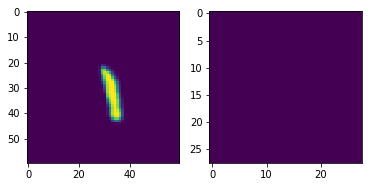

In [64]:
%matplotlib inline
index = np.random.randint(0,10000)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(X_test_40[index].reshape((60,60)))
recon = recon_net.predict(X_test_40[index].reshape(1,60,60,1))
ax2.imshow(recon.reshape((28,28)))
plt.show()
#print(np.max(X_test_28[index]),np.min(X_test_40[index]))
#print(np.max(recon),np.min(recon))

## Sanity Check

In [ ]:
X_train_40[1].shape

In [ ]:
## Load Images

# load 4 cat images
img1 = X_train_40[1]
img2 = X_train_40[2]
img3 = X_train_40[3]
img4 = X_train_40[4]

input_img = np.stack([img1, img2, img3, img4], axis=0)
B, H, W, C = input_img.shape
print("Input Img Shape: {}".format(input_img.shape))

In [ ]:
## Identity Transform

theta = np.array([[100., 0, 0], [0, 100., 0]])

x = tf.placeholder(tf.float32, [None, H, W, C])

with tf.variable_scope('spatial_transformer'):
    theta = theta.astype('float32')
    theta = theta.flatten()

    # define loc net weight and bias
    loc_in = H*W*C
    loc_out = 6
    W_loc = tf.Variable(tf.zeros([loc_in, loc_out]), name='W_loc')
    b_loc = tf.Variable(initial_value=theta, name='b_loc')
    
    # tie everything together
    fc_loc = tf.tanh(tf.matmul(tf.zeros([B, loc_in]), W_loc) + b_loc)
    h_trans = Functions.spatial_transformer_network(x, fc_loc)

In [ ]:
# run session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
y = sess.run(h_trans, feed_dict={x: input_img})
print("y: {}".format(y.shape))


In [ ]:
fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
ax1.imshow(input_img[0].reshape((40,40)))
ax2.imshow(y[0].reshape((40,40)))
ax3.imshow(input_img[1].reshape((40,40)))
ax4.imshow(y[1].reshape((40,40)))
ax5.imshow(input_img[2].reshape((40,40)))
ax6.imshow(y[2].reshape((40,40)))
ax7.imshow(input_img[3].reshape((40,40)))
ax8.imshow(y[3].reshape((40,40)))

## Rotation

In [ ]:
# initialize affine transform tensor `theta`
import math
degree = 45
theta = np.array([
    [np.cos(math.radians(degree)), -np.sin(math.radians(degree)), 0], 
    [np.sin(math.radians(degree)), np.cos(math.radians(degree)), 0]
])

In [ ]:
x = tf.placeholder(tf.float32, [None, H, W, C])

with tf.variable_scope('spatial_transformer'):
    theta = theta.astype('float32')
    theta = theta.flatten()

    # define loc net weight and bias
    loc_in = H*W*C
    loc_out = 6
    W_loc = tf.Variable(tf.zeros([loc_in, loc_out]), name='W_loc')
    b_loc = tf.Variable(initial_value=theta, name='b_loc')
    
    # tie everything together
    fc_loc = tf.matmul(tf.zeros([B, loc_in]), W_loc) + b_loc
    h_trans = Functions.spatial_transformer_network(x, fc_loc)

In [ ]:
# run session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
y = sess.run(h_trans, feed_dict={x: input_img})
print("y: {}".format(y.shape))

In [ ]:
fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
ax1.imshow(input_img[0].reshape((40,40)))
ax2.imshow(y[0].reshape((40,40)))
ax3.imshow(input_img[1].reshape((40,40)))
ax4.imshow(y[1].reshape((40,40)))
ax5.imshow(input_img[2].reshape((40,40)))
ax6.imshow(y[2].reshape((40,40)))
ax7.imshow(input_img[3].reshape((40,40)))
ax8.imshow(y[3].reshape((40,40)))

## Zoom in

In [ ]:
# initialize affine transform tensor `theta`
import math
degree = 45
theta = np.array([
    [-1*np.cos(math.radians(degree)), -1*-np.sin(math.radians(degree)), 0], 
    [-1*np.sin(math.radians(degree)), -1*np.cos(math.radians(degree)), 0]
])

In [ ]:
x = tf.placeholder(tf.float32, [None, H, W, C])

with tf.variable_scope('spatial_transformer'):
    theta = theta.astype('float32')
    theta = theta.flatten()

    # define loc net weight and bias
    loc_in = H*W*C
    loc_out = 6
    W_loc = tf.Variable(tf.zeros([loc_in, loc_out]), name='W_loc')
    b_loc = tf.Variable(initial_value=theta, name='b_loc')
    
    # tie everything together
    fc_loc = tf.matmul(tf.zeros([B, loc_in]), W_loc) + b_loc
    h_trans = Functions.spatial_transformer_network(x, fc_loc)

In [ ]:
# run session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
y = sess.run(h_trans, feed_dict={x: input_img})
print("y: {}".format(y.shape))

In [ ]:
fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
ax1.imshow(input_img[0].reshape((40,40)))
ax2.imshow(y[0].reshape((40,40)))
ax3.imshow(input_img[1].reshape((40,40)))
ax4.imshow(y[1].reshape((40,40)))
ax5.imshow(input_img[2].reshape((40,40)))
ax6.imshow(y[2].reshape((40,40)))
ax7.imshow(input_img[3].reshape((40,40)))
ax8.imshow(y[3].reshape((40,40)))

## Zoom out

In [ ]:
# initialize affine transform tensor `theta`
import math
degree = 45
theta = np.array([
    [3*np.cos(math.radians(degree)), 3*-np.sin(math.radians(degree)), 0], 
    [3*np.sin(math.radians(degree)), 3*np.cos(math.radians(degree)), 0]
])

x = tf.placeholder(tf.float32, [None, H, W, C])

with tf.variable_scope('spatial_transformer'):
    theta = theta.astype('float32')
    theta = theta.flatten()

    # define loc net weight and bias
    loc_in = H*W*C
    loc_out = 6
    W_loc = tf.Variable(tf.zeros([loc_in, loc_out]), name='W_loc')
    b_loc = tf.Variable(initial_value=theta, name='b_loc')
    
    # tie everything together
    fc_loc = tf.matmul(tf.zeros([B, loc_in]), W_loc) + b_loc
    h_trans = Functions.spatial_transformer_network(x, fc_loc)
    
# run session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
y = sess.run(h_trans, feed_dict={x: input_img})
print("y: {}".format(y.shape))

fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
ax1.imshow(input_img[0].reshape((40,40)))
ax2.imshow(y[0].reshape((40,40)))
ax3.imshow(input_img[1].reshape((40,40)))
ax4.imshow(y[1].reshape((40,40)))
ax5.imshow(input_img[2].reshape((40,40)))
ax6.imshow(y[2].reshape((40,40)))
ax7.imshow(input_img[3].reshape((40,40)))
ax8.imshow(y[3].reshape((40,40)))